In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_scores = pd.read_csv("../output/model_comparisons.csv")
df_scores = df_scores.loc[~df_scores["Random"]]

df_scores=df_scores.sort_values(by='Improvement', ascending=False)
df_scores.head(10)
#print(df_scores.head(10).to_string())

,Name,Score,Improvement,Complexity,Nr Samples,Nr Features,Random
5,xgboost_norm=0_weighted_title_prepend_sampling...,0.435013,0.075771,218440,1270,172,False
1,xgboost_norm=0_weighted_title_prepend_sampling...,0.424971,0.075043,395256,2298,172,False
3,xgboost_norm=0_weighted_title_prepend_sampling...,0.436422,0.067068,322672,1876,172,False


/tmp/ipykernel_9742/868920134.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()  # otherwise the right y-label is slightly clipped


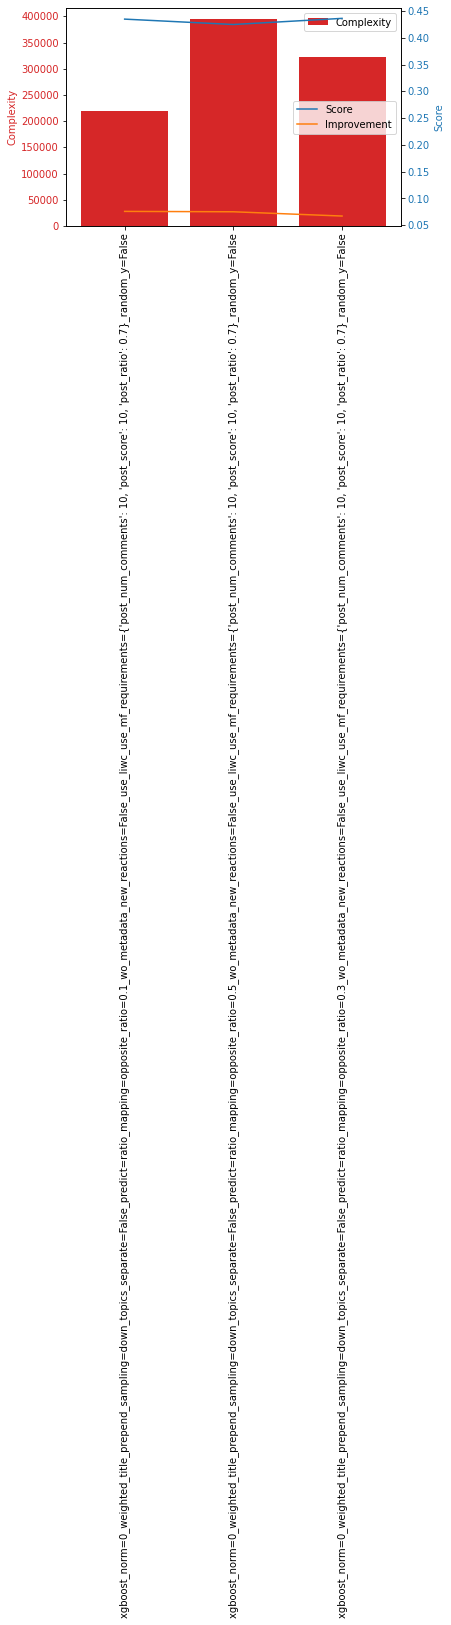

In [34]:


#df_scores['Complexity'].plot(kind='bar', width = width)
#df_scores[['Score', 'Improvement']].plot(secondary_y=True)

x_ticks = df_scores["Name"]
x_loc = range(len(df_scores))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('Complexity', color=color)  # we already handled the x-label with ax1
ax1.bar(x_loc, df_scores["Complexity"], color=color, )
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x_loc)
ax1.set_xticklabels(x_ticks, rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Score', color=color)
ax2.plot(x_loc, df_scores["Score"], color='tab:blue',)
ax2.plot(x_loc, df_scores["Improvement"], color='tab:orange')
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(['Complexity'])
ax2.legend(['Score', 'Improvement'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()